# Pontos de Intersecção entre o Grad CAM e o LIME
***

### Importação dos pacotes básicos

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

### Importação do modelo CNN treinado

In [2]:
# importando o modelo previamento definido e treinado
import urllib.request as url
# definindo o caminho de download e o arquivo de recebimento 
path = 'https://raw.githubusercontent.com/Alyssonmach/grad-cam-implementation/main/assets/keras_model.py'
file_ = 'keras_model.py'
# fazendo a importação dos scripts
url.urlretrieve(path, file_)
# importando os scripts da definição do modelo
from keras_model import pre_processamento

In [3]:
# importando o modelo e os exemplos de teste
model_grad, model_base, (x, y) = pre_processamento()

total de imagens disponíveis: 15000

total de dados após a filtração: 13948

quantidade de dados rotulados como normais: 10606
quantidade de dados rotulados como anormais: 3342

quantidade de dados rotulados como normais (balanceado): 3287
quantidade de dados rotulados como anormais: 3342

quantidade de imagens de treinamento: 4242
quantidade de rótulos de treinamento: 4242
quantidade de imagens de teste: 1326
quantidade de rótulos de teste: 1326
quantidade de imagens de validação: 1061
quantidade de rótulos de validação: 1061 

Found 4241 validated image filenames.
Found 1061 validated image filenames.
Found 1326 validated image filenames.


In [4]:
# definindo o caminho das imagens de teste
path1 = '/content/drive/MyDrive/vinbigdata/test/002a34c58c5b758217ed1f584ccbcfe9.jpg'
path2 = '/content/drive/MyDrive/vinbigdata/test/041c40e3f03d9af32b594c5186575a61.jpg'
path3 = '/content/drive/MyDrive/vinbigdata/test/3bde9f07f146da27d795709456f6ab17.jpg'
path4 = '/content/drive/MyDrive/vinbigdata/test/037503b94eb68a16587a78bce365e681.jpg'


### Algoritmo Grad CAM

In [6]:
# importando do repositório as funções do grad-cam
link = 'https://raw.githubusercontent.com/Alyssonmach/grad-cam-implementation/main/assets/grad_cam.py'
file_ = 'grad_cam.py'
url.urlretrieve(link, file_)

from grad_cam import get_img_array, make_gradcam_heatmap, save_and_display_gradcam, get_grad_cam

In [7]:
# tamanho padrão das imagens do modelo
img_size = (256, 256)
# importando os parâmetros de pré-processamento da rede
preprocess_input = keras.applications.inception_v3.preprocess_input

Porcentagem de anormalidade: [[5.0336065]] %


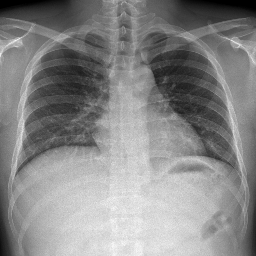

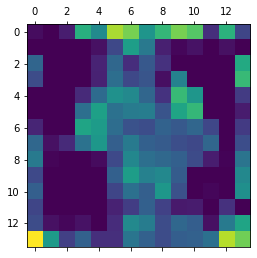

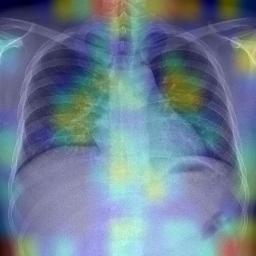

In [39]:
# definindo a última camada da rede a ser considerada
last_conv_layer = 'conv2d_50'

# plota os gráficos do algoritmo grad cam
heatmap_grad = get_grad_cam(img_size = img_size, preprocess_input = preprocess_input,
                            last_conv_layer = last_conv_layer, path = path1, 
                            model_base = model_base, model_grad = model_grad,
                            save_file = 'image1.png')

Porcentagem de anormalidade: [[11.508318]] %


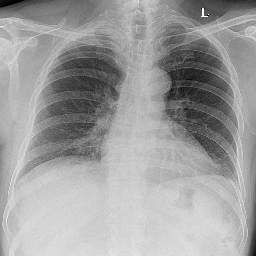

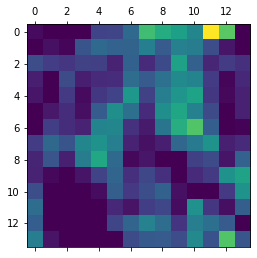

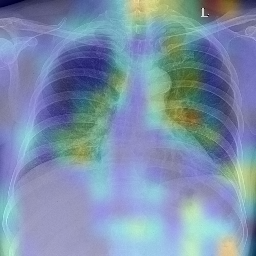

In [40]:
# definindo a última camada da rede a ser considerada
last_conv_layer = 'conv2d_50'

# plota os gráficos do algoritmo grad cam
heatmap_grad = get_grad_cam(img_size = img_size, preprocess_input = preprocess_input,
                            last_conv_layer = last_conv_layer, path = path2, 
                            model_base = model_base, model_grad = model_grad,
                            save_file = 'image2.png')

Porcentagem de anormalidade: [[0.43479252]] %


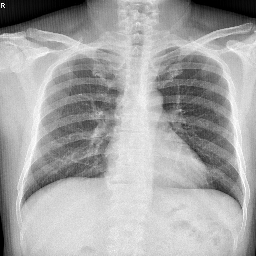

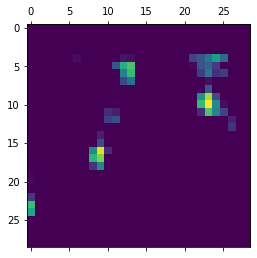

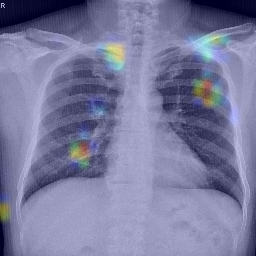

In [41]:
# definindo a última camada da rede a ser considerada
last_conv_layer = 'conv2d_18' 

# plota os gráficos do algoritmo grad cam
heatmap_grad = get_grad_cam(img_size = img_size, preprocess_input = preprocess_input,
                            last_conv_layer = last_conv_layer, path = path3, 
                            model_base = model_base, model_grad = model_grad,
                            save_file = 'image3.png')

Porcentagem de anormalidade: [[99.88438]] %


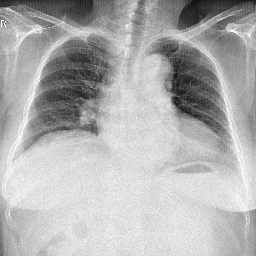

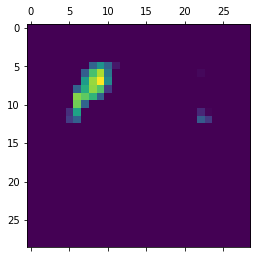

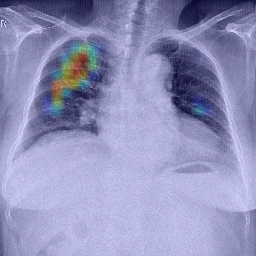

In [43]:
# definindo a última camada da rede a ser considerada
last_conv_layer = 'conv2d_18' 

# plota os gráficos do algoritmo grad cam
heatmap_grad = get_grad_cam(img_size = img_size, preprocess_input = preprocess_input,
                            last_conv_layer = last_conv_layer, path = path4, 
                            model_base = model_base, model_grad = model_grad,
                            save_file = 'image4.png')

## Algoritmo LIME

In [12]:
# instalando o pacote do lime
!pip install lime

     |████████████████████████████████| 276kB 9.1MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=be7bf54944f532a88cfd8870904255a1081c5979876b34f9219002975840f7fe
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [13]:
# definido o caminho dos scripts e o arquivo receptor
path = 'https://raw.githubusercontent.com/Alyssonmach/grad-cam-implementation/main/assets/lime_plots.py'
file_ = 'lime_plots.py'
# requisitando os scripts do repositório
url.urlretrieve(path, file_)
# importando os scripts do algoritmo lime
from lime_plots import lime_plot 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



image predict: [[5.0336065]] %


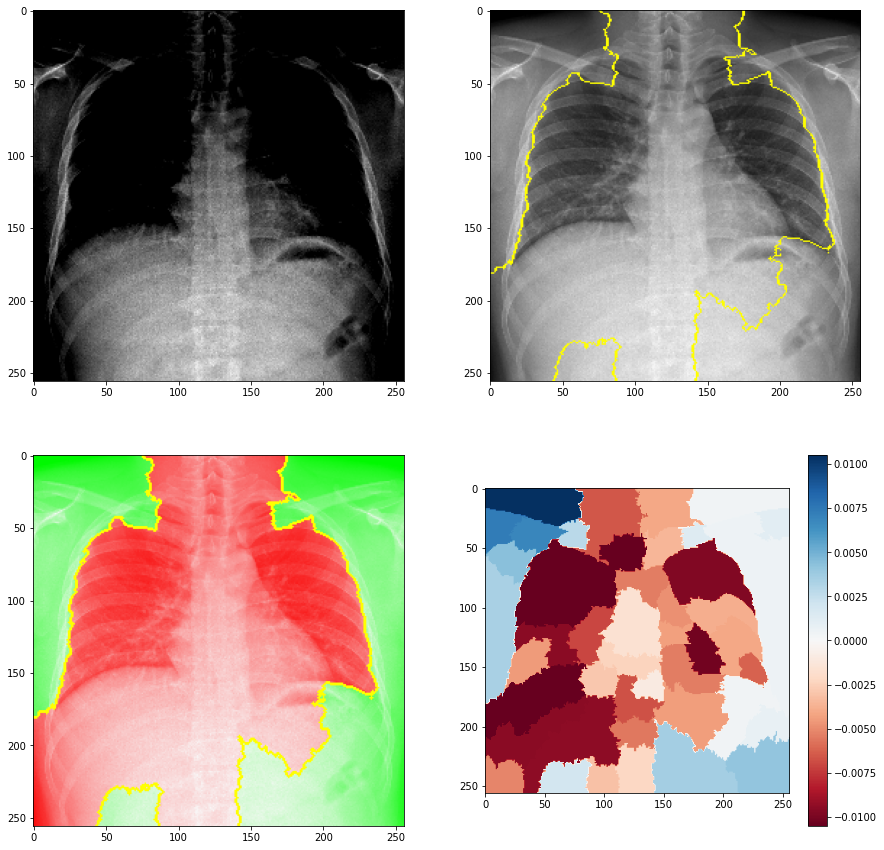

In [26]:
# plotando os gráficos do algoritmo lime
heatmap = lime_plot(path = path1, img_size = img_size, model_base = model_base, 
                    preprocess_input = preprocess_input, top_labels = 1, 
                    label_select = 0, num_sampes = 3000,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



image predict: [[11.508318]] %


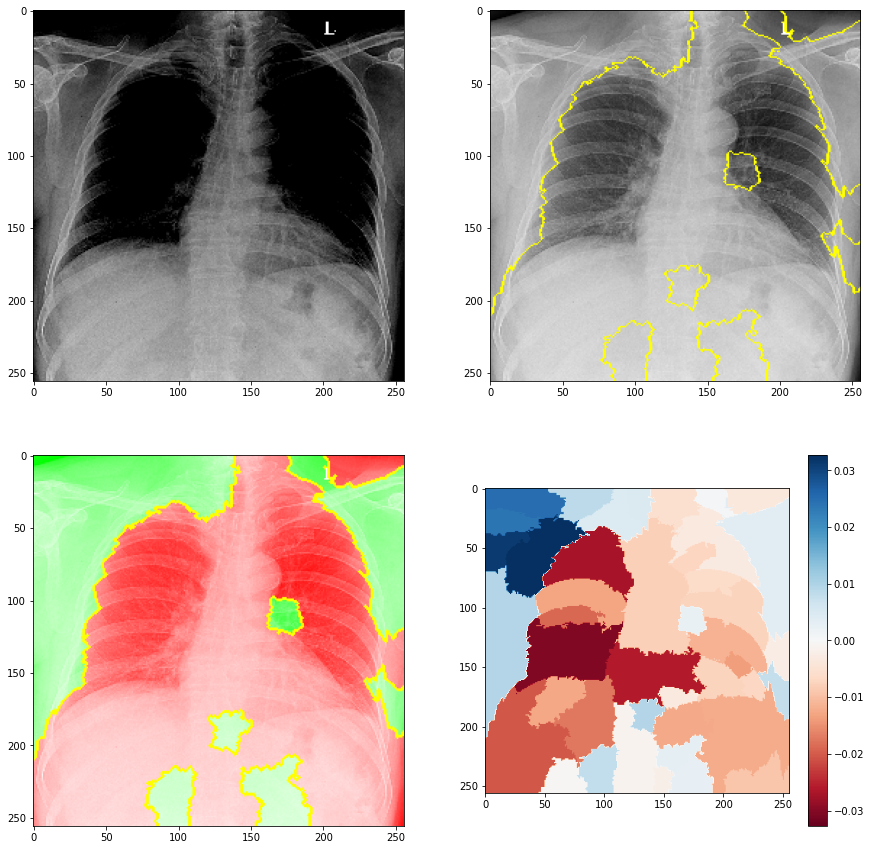

In [27]:
# plotando os gráficos do algoritmo lime
heatmap = lime_plot(path = path2, img_size = img_size, model_base = model_base, 
                    top_labels = 1, label_select = 0, num_sampes = 3000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



image predict: [[0.43479252]] %


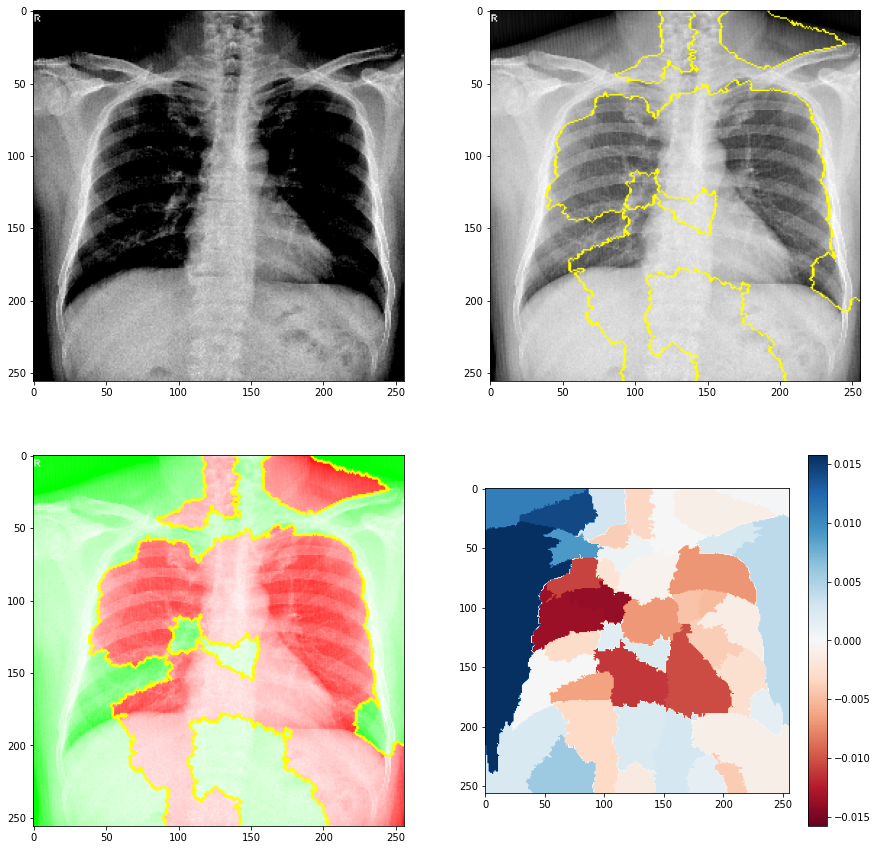

In [28]:
# plotando os gráficos do algoritmo lime
heatmap = lime_plot(path = path3, img_size = img_size, model_base = model_base, 
                    top_labels = 1, label_select = 0, num_sampes = 3000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



image predict: [[99.88438]] %


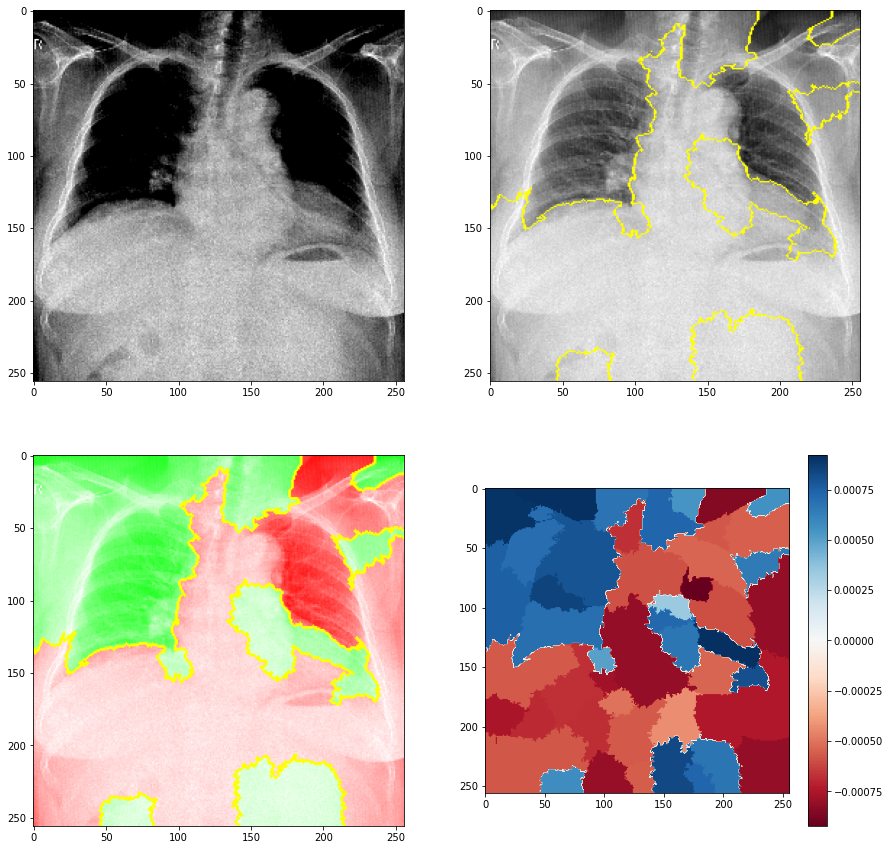

In [30]:
# plotando os gráficos do algoritmo lime
heatmap = lime_plot(path = path4, img_size = img_size, model_base = model_base, 
                    top_labels = 1, label_select = 0, num_sampes = 3000)

### Intersecção e Diferença (Grad CAM e LIME)

In [46]:
# definindo o caminhos dos scripts e o arquivo receptor
path = 'https://raw.githubusercontent.com/Alyssonmach/grad-cam-implementation/main/assets/analysis_grad_lime.py'
file_ = 'analysis_grad_lime.py'
# requisitando os scripts do repositório
url.urlretrieve(path, file_)
# importando os scripts
from analysis_grad_lime import lime_positive_areas, grad_one_channel, heatmap_intersection
from analysis_grad_lime import heatmap_difference, heatmap_three_channels, display_heatmap

In [44]:
# mantendo as áreas positivados do mapa de calor do lime
heatmap_lime = lime_positive_areas(heatmap)
# organizando em apenas um canal de imagem o mapa de calor da grad cam
heatmap_grad = grad_one_channel(heatmap = heatmap_grad, image_size = img_size, threshold = 150)
# construindo a interseção entre os dois mapas de calor
intersection_heatmap = heatmap_intersection(heatmap_lime, heatmap_grad, image_size = img_size)
# construindo os pontos de diferença entre os dois mapas de calor 
difference_heatmap = heatmap_difference(heatmap_lime, heatmap_grad, image_size = img_size)
# alinhando os mapas de calor com três canais de imagem novamente
intersection_heatmap = heatmap_three_channels(intersection_heatmap)
difference_heatmap = heatmap_three_channels(difference_heatmap)

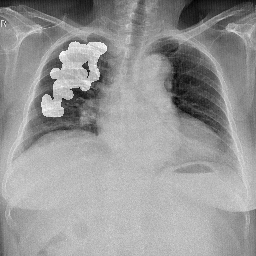

In [47]:
# visualizando o campo de intersecção dos mapas de calor na imagem
display_heatmap(img_path = path4, heatmap = intersection_heatmap, image_size = img_size,
                cam_path = 'image5.png', alpha = 150)

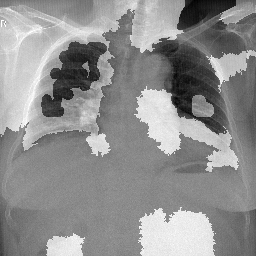

In [48]:
# visualizando o campo de diferença dos mapas de calor na imagem
display_heatmap(img_path = path4, heatmap = difference_heatmap, image_size = img_size,
                cam_path = 'image6.png', alpha = 150)